# Agent-Based Modelling

### _Shreya Raghavendra (13756877), Boyan Mihaylov (15067602), Eline van de Lagemaat (11892900), Sofia Tavitian (14824248), Chayenne Olumuyiwa (12055662)_

In [1]:
import numpy as np
from importlib import reload

import model as mdl
import agent as agt
import visualisation as vis

In [2]:
reload(mdl)
reload(agt)

<module 'agent' from '/Users/chayenneolumuyiwa/Documents/Universiteit/Computational Science/jaar 1 /ABM/agent-based-modelling/Project/agent.py'>

In [3]:
import warnings
warnings.filterwarnings('ignore')

<Axes: >

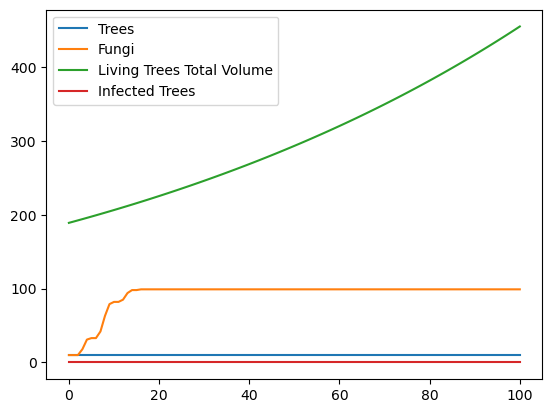

In [4]:
%matplotlib inline

width = 10
height = 10
n_init_trees = 10
n_init_fungi = 10
model = mdl.Forest(width, height, n_init_trees, n_init_fungi)
model.run_model()

data = model.datacollector.get_model_vars_dataframe()
data.plot()

In [70]:
reload(vis)
reload(agt)
reload(mdl)

<module 'model' from '/Users/chayenneolumuyiwa/Documents/Universiteit/Computational Science/jaar 1 /ABM/agent-based-modelling/Project/model.py'>

In [5]:
model_params = {
    "n_init_trees": {
        "type": "SliderInt",
        "value": 50,
        "label": "Number of agents:",
        "min": 10,
        "max": 100,
        "step": 1,
    },
    "n_init_fungi": {
        "type": "SliderInt",
        "value": 50,
        "label": "Number of agents:",
        "min": 10,
        "max": 100,
        "step": 1,
    },
    "width": 10,
    "height": 10,
}

vis.create_jupyter_viz(mdl.Forest, model_params, measures=["Trees", "Fungi"])

Cannot show ipywidgets in text